In [1]:
import os

os.chdir("E:/code/6.MachineLearning/3_Logistic_Regression")

In [2]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### preprocessing
- no need to do preprocessing

#### EDA: how data is distributed in each column

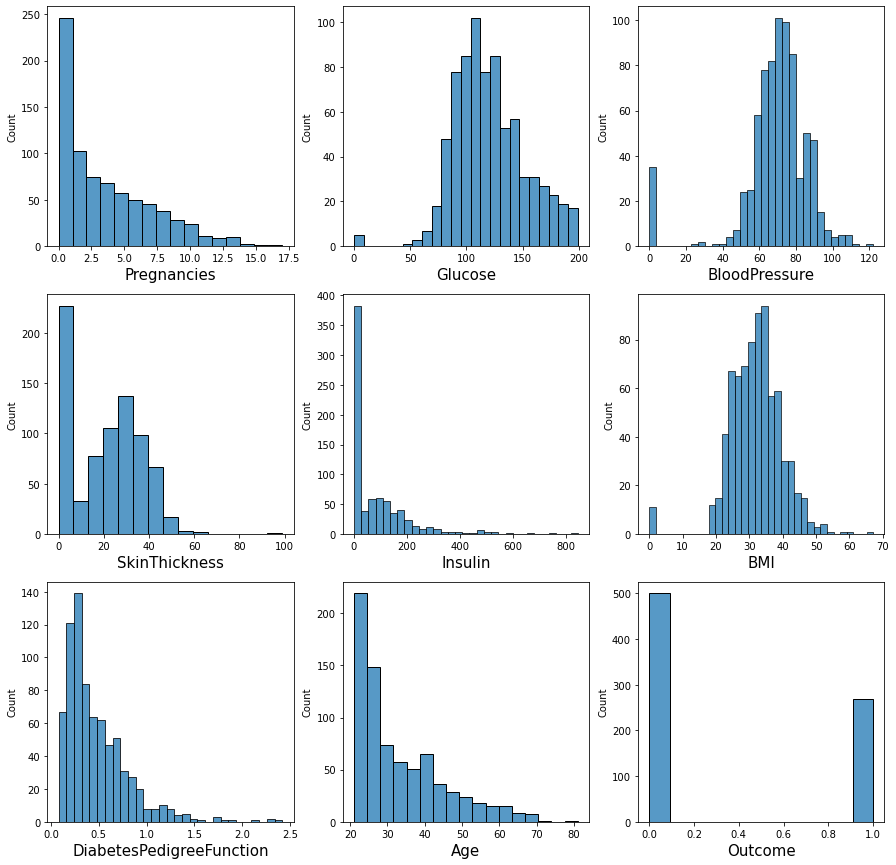

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
        #sns.distplot(df[column])         # going to depricate
        plt.xlabel(column,fontsize=15)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

#### replacing zero values with mean of that column

In [7]:
df["Glucose"] = df["Glucose"].replace(0, df.Glucose.mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())
df["BMI"] = df["BMI"].replace(0, df['BMI'].mean())

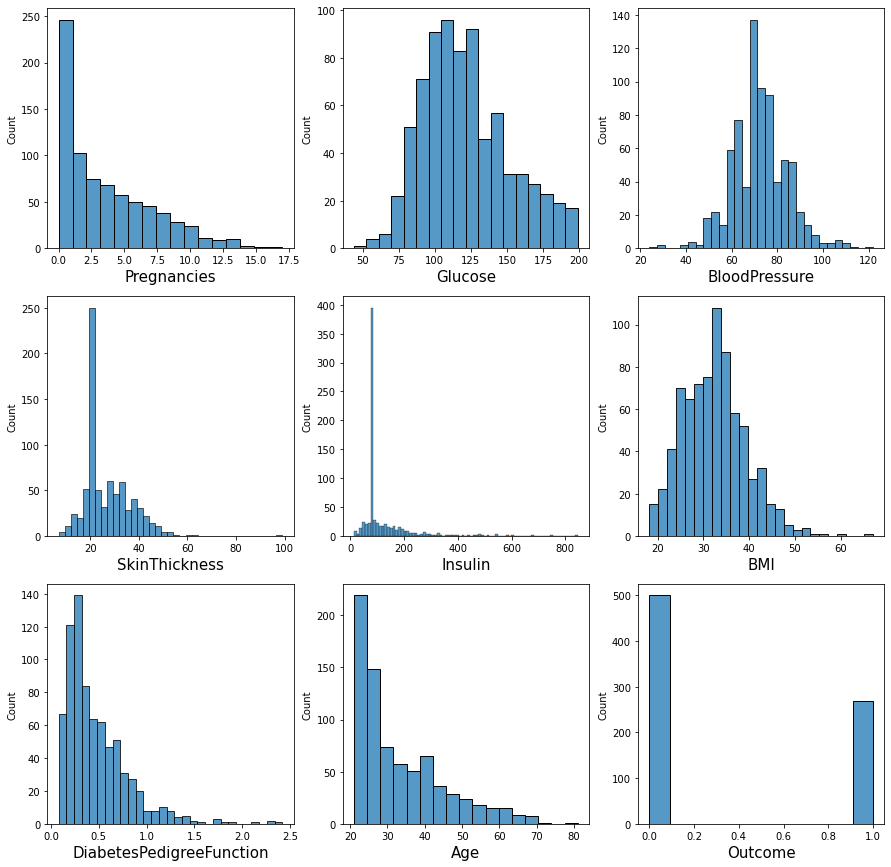

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
        #sns.distplot(df[column])         # going to depricate
        plt.xlabel(column,fontsize=15)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns. Let's deal with them.

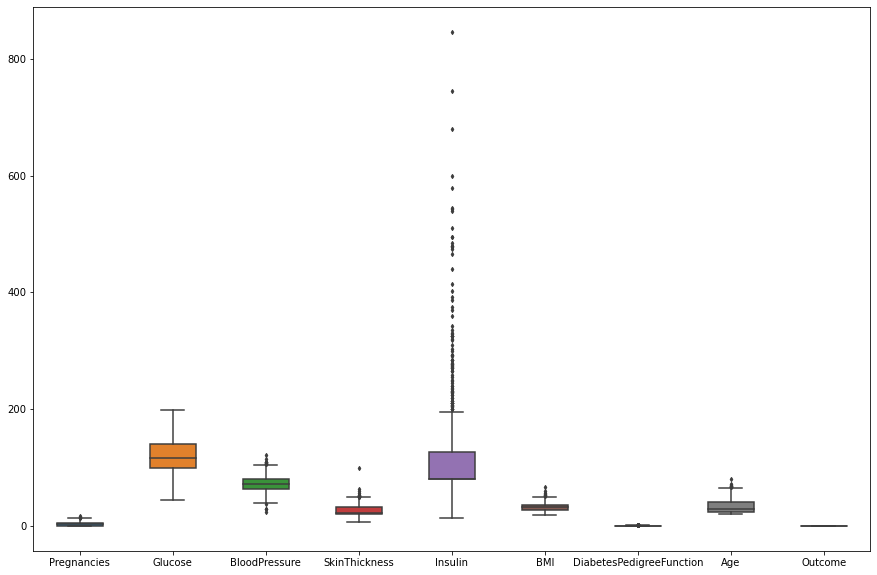

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)
plt.show()

In [10]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% df from the Pregnancies column
df_cleaned = df[df['Pregnancies']<q]
q = df_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% df from the BMI column
df_cleaned  = df_cleaned[df_cleaned['BMI']<q]
q = df_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% df from the SkinThickness column
df_cleaned  = df_cleaned[df_cleaned['SkinThickness']<q]
q = df_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% df from the Insulin column
df_cleaned  = df_cleaned[df_cleaned['Insulin']<q]
q = df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% df from the DiabetesPedigreeFunction column
df_cleaned  = df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]
q = df_cleaned['Age'].quantile(0.99)
# we are removing the top 1% df from the Age column
df_cleaned  = df_cleaned[df_cleaned['Age']<q]

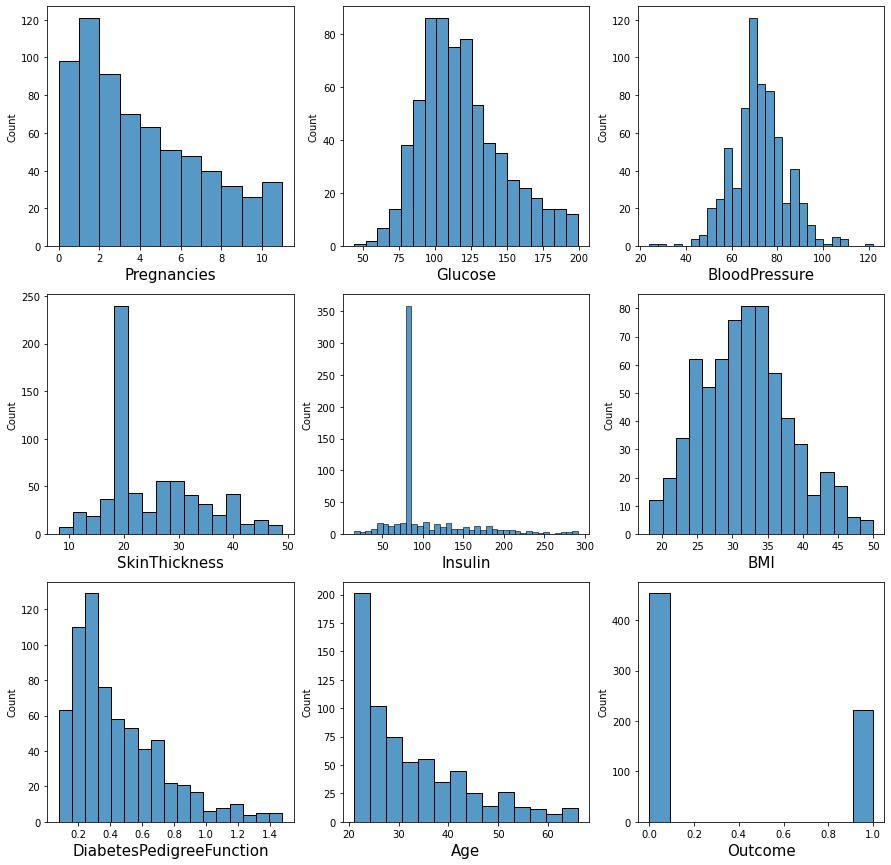

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in df_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df_cleaned[column])
        #sns.distplot(df_cleaned[column])
        plt.xlabel(column,fontsize=15)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LENOVO\Anacon

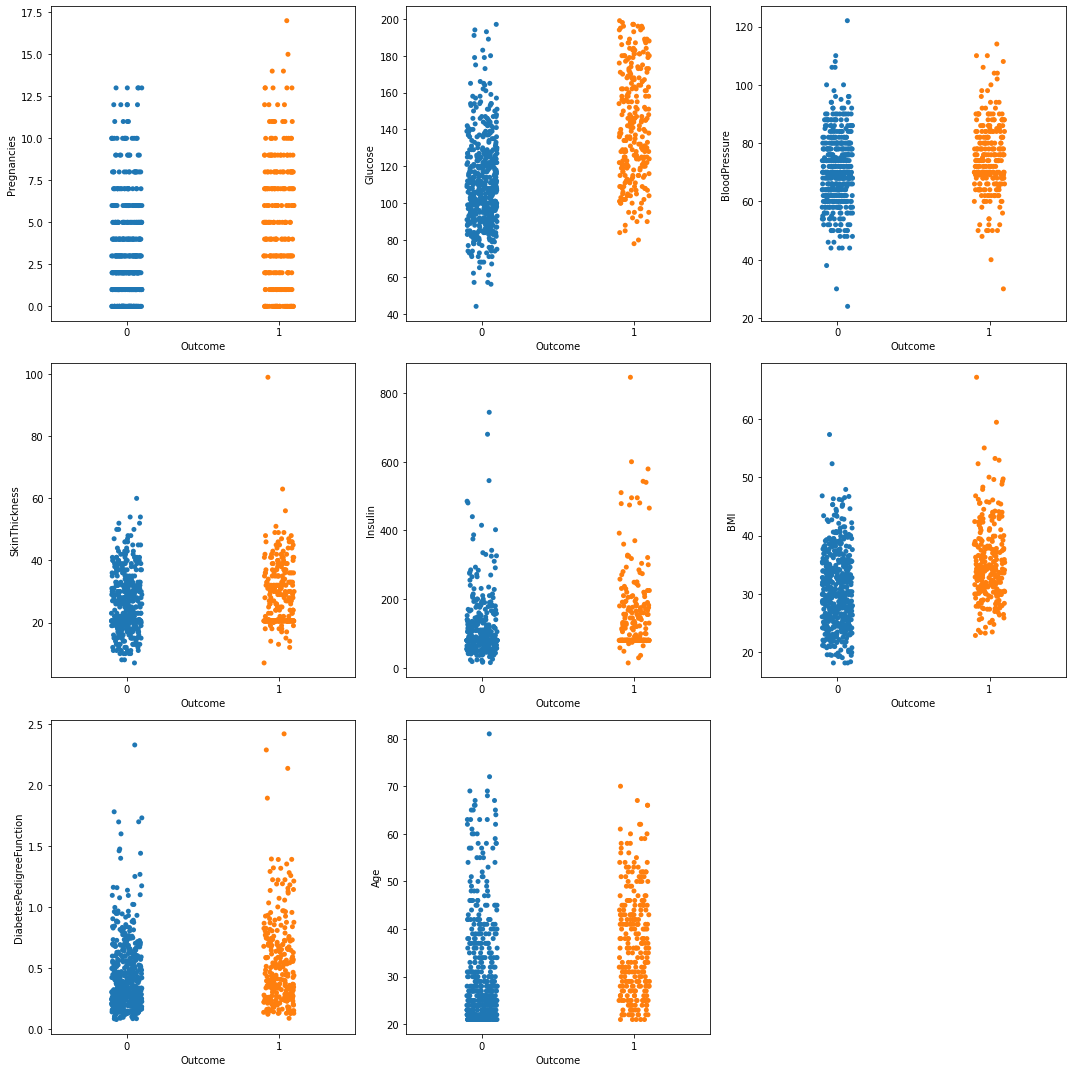

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()
plt.show()

Great!! Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [15]:
X_scaled[:10]

array([[ 0.63994726,  0.86527574, -0.0210444 ,  0.87205698, -0.41776815,
         0.16725546,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286,  0.2486783 , -0.41776815,
        -0.85153454, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, -0.6306536 , -0.41776815,
        -1.33182125,  0.60439732, -0.10558415],
       [-0.84488505, -1.07448042, -0.51658286, -0.37470037, -0.26510678,
        -0.6332224 , -0.92076261, -1.04154944],
       [-1.14185152,  0.50362629, -2.66391618,  0.87205698,  0.5304233 ,
         1.54989902,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.1867954 ,  0.14413508, -0.6306536 , -0.41776815,
        -0.99707597, -0.81807858, -0.27575966],
       [-0.25095213, -1.43612988, -1.83801875,  0.56036764, -0.32960921,
        -0.21115225, -0.676133  , -0.61611067],
       [ 1.82781311, -0.21967262, -0.260103  , -0.6306536 , -0.41776815,
         0.41467589, -1.02042653, -0.36084741],
       [-0.54791859,  2.47625968

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [17]:
X = X.values
y = y.values

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=46)

In [19]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_test_pred = log_model.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [21]:
y_test[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test,y_test_pred)

0.7662337662337663

In [23]:
con_matrix = confusion_matrix(y_test, y_test_pred)
con_matrix

array([[128,  23],
       [ 31,  49]], dtype=int64)

#### tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [24]:
tn = con_matrix[0][0]
fp = con_matrix[0][1]
fn = con_matrix[1][0]
tp = con_matrix[1][1]

In [25]:
(128+49)/(128+23+31+49)

0.7662337662337663

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.68      0.61      0.64        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



In [27]:
y_score = log_model.predict_proba(X_test)[:,1]
y_score[:10]

array([0.40266448, 0.05048552, 0.44573649, 0.23948026, 0.41561775,
       0.59623332, 0.53684875, 0.75636999, 0.09016697, 0.53792985])

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score)

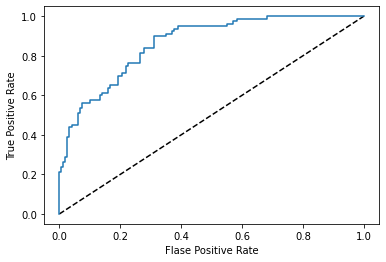

In [29]:
import matplotlib.pyplot as plt

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [30]:
import os

os.getcwd()

'E:\\code\\6.MachineLearning\\3_Logistic_Regression'

In [31]:
import pickle

filename = "log_model.pickle"
pickle.dump(log_model, open(filename, "wb"))

In [32]:
loaded_model = pickle.load(open(filename,"rb"))
loaded_model.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1], dtype=int64)